In [32]:
import math

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import pandas as pd
import os

plt.rcParams["font.family"] = "Outfit"
# plt.rcParams["font.sans-serif"] = ["Outfit"]

In [33]:
# path to the data folder
DATA_PATH = "../../../../HFTT_Data/"

CURRENCIES = {"USD", "EUR", "JPY", "GBP", "CNH", "AUD", "CAD", "CHF", "HKD", "SGD"}

In [34]:
df = pd.DataFrame({"Profit": [], "Cycle": [], "Timestamp": [], "Base to USD": [], "Date": []})

for dir in os.listdir(DATA_PATH):
    if not os.path.isdir(f"{DATA_PATH}{dir}"):
        continue
    for file in os.listdir(f"{DATA_PATH}{dir}/"):
        if "arbs" not in file:
            continue
        date = file.split("_")[0]
        file_df = pd.read_csv(f"{DATA_PATH}{dir}/{file}")
        file_df["Date"] = datetime.strptime(date, "%Y-%m-%d")
        df = pd.concat([df, file_df], ignore_index=True)

df

/var/folders/vn/fnkqmd6j4v7d8hktrkxjs1cm0000gn/T/ipykernel_29670/1766440865.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, file_df], ignore_index=True)


,Profit,Cycle,Timestamp,Base to USD,Date
0,1.000003,JPY HKD USD,1.738627e+09,NaN,2025-02-04
1,1.000029,JPY HKD USD,1.738627e+09,NaN,2025-02-04
2,1.000016,JPY HKD USD,1.738627e+09,NaN,2025-02-04
3,1.000029,JPY HKD USD,1.738627e+09,NaN,2025-02-04
4,1.000028,CHF HKD,1.738627e+09,NaN,2025-02-04
...,...,...,...,...,...
2717418,1.000509,SGD CHF USD,1.741986e+09,NaN,2025-03-14
2717419,1.000231,CHF HKD,1.741986e+09,NaN,2025-03-14
2717420,1.000100,CHF HKD USD,1.741986e+09,NaN,2025-03-14
2717421,1.000231,CHF HKD,1.741986e+09,NaN,2025-03-14


In [35]:
# convert profit and base to usd to floats
df["Profit"] = df["Profit"].astype(float)
df["Base to USD"] = df["Base to USD"].astype(float)

# convert the cycle to a list of symbols and store its length
df["Cycle"] = df["Cycle"].str.split()
df["Cycle Length"] = df["Cycle"].apply(lambda i: len(i))

df

,Profit,Cycle,Timestamp,Base to USD,Date,Cycle Length
0,1.000003,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
1,1.000029,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
2,1.000016,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
3,1.000029,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
4,1.000028,"[CHF, HKD]",1.738627e+09,NaN,2025-02-04,2
...,...,...,...,...,...,...
2717418,1.000509,"[SGD, CHF, USD]",1.741986e+09,NaN,2025-03-14,3
2717419,1.000231,"[CHF, HKD]",1.741986e+09,NaN,2025-03-14,2
2717420,1.000100,"[CHF, HKD, USD]",1.741986e+09,NaN,2025-03-14,3
2717421,1.000231,"[CHF, HKD]",1.741986e+09,NaN,2025-03-14,2


In [36]:
# filter out rows with a profit of 1 since those are useless
df = df[df["Profit"] > 1.0]

df

,Profit,Cycle,Timestamp,Base to USD,Date,Cycle Length
0,1.000003,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
1,1.000029,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
2,1.000016,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
3,1.000029,"[JPY, HKD, USD]",1.738627e+09,NaN,2025-02-04,3
4,1.000028,"[CHF, HKD]",1.738627e+09,NaN,2025-02-04,2
...,...,...,...,...,...,...
2717418,1.000509,"[SGD, CHF, USD]",1.741986e+09,NaN,2025-03-14,3
2717419,1.000231,"[CHF, HKD]",1.741986e+09,NaN,2025-03-14,2
2717420,1.000100,"[CHF, HKD, USD]",1.741986e+09,NaN,2025-03-14,3
2717421,1.000231,"[CHF, HKD]",1.741986e+09,NaN,2025-03-14,2


In [37]:
df[["Profit", "Cycle Length"]].describe()

,Profit,Cycle Length
count,2.717278e+06,2.717278e+06
mean,1.000098e+00,2.710649e+00
std,2.404495e-04,7.831403e-01
min,1.000000e+00,2.000000e+00
25%,1.000017e+00,2.000000e+00
50%,1.000044e+00,3.000000e+00
75%,1.000103e+00,3.000000e+00
max,1.043642e+00,9.000000e+00


In [38]:
# count the number of arb opportunities at each profit level
profits = {}
for i in df["Profit"]:
    profits[i] = profits.get(i, 0) + 1

profits

{1.000003273225897: 1,
 1.0000290426872067: 2,
 1.0000161579565523: 1,
 1.0000282659721127: 1,
 1.0000370724599414: 2,
 1.000011473162091: 1,
 1.000038195: 7,
 1.000019376960372: 1,
 1.0000293091253414: 1,
 1.000090184104396: 2,
 1.0000837423826527: 2,
 1.0000773006609092: 1,
 1.0000480183975555: 1,
 1.000104146214198: 2,
 1.0000729640938406: 1,
 1.0000043634290556: 3,
 1.0000355455494128: 1,
 1.0000105998531266: 2,
 1.0000516025463289: 1,
 1.0000129415048853: 3,
 1.0000028826944516: 2,
 1.0000094102955677: 4,
 1.0000258285186994: 4,
 1.000032272025607: 2,
 1.000021963374637: 1,
 1.0000736820604024: 1,
 1.0000350185768692: 2,
 1.000041546177985: 1,
 1.000038715532514: 1,
 1.0001552436: 4,
 1.0000139057999995: 4,
 1.0000152105550213: 1,
 1.0000129390125967: 2,
 1.0000064961699286: 1,
 1.0000000533272613: 1,
 1.000002498927253: 1,
 1.0000515331100177: 2,
 1.000077299665029: 1,
 1.0000579747487706: 3,
 1.0000064915231346: 2,
 1.000032256917639: 1,
 1.000011766459468: 3,
 1.000025815569013

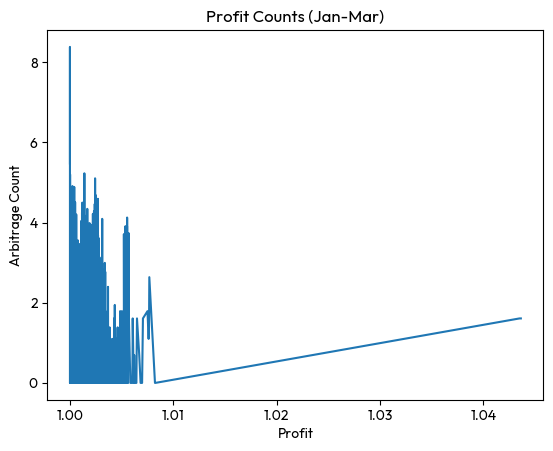

In [39]:
# plot the arb profits
ps = [i for i in sorted(profits)]
counts = [math.log(profits[i]) for i in ps]

plt.plot(ps, counts)
plt.title("Profit Counts (Jan-Mar)")
plt.ylabel("Arbitrage Count")
plt.xlabel("Profit")
plt.show()

In [40]:
data_density = {}

for dir in os.listdir(DATA_PATH):
    if not os.path.isdir(f"{DATA_PATH}{dir}"):
        continue
    for file in os.listdir(f"{DATA_PATH}{dir}/"):
        if "filtered" not in file:
            continue
        date = file.split("_")[0]
        data_density[date] = {}
        temp = pd.read_csv(f"{DATA_PATH}{dir}/{file}")
        timestamps = temp["participant_timestamp"].nunique()
        data_density[date]['n_timestamps'] = timestamps

data_density

{'2025-02-09': {'n_timestamps': 6987},
 '2025-02-10': {'n_timestamps': 86335},
 '2025-02-17': {'n_timestamps': 86341},
 '2025-02-02': {'n_timestamps': 7029},
 '2025-02-05': {'n_timestamps': 86330},
 '2025-02-21': {'n_timestamps': 79159},
 '2025-02-26': {'n_timestamps': 86175},
 '2025-02-04': {'n_timestamps': 86268},
 '2025-02-03': {'n_timestamps': 86393},
 '2025-02-16': {'n_timestamps': 6705},
 '2025-02-11': {'n_timestamps': 86124},
 '2025-02-27': {'n_timestamps': 86359},
 '2025-02-20': {'n_timestamps': 86379},
 '2025-02-06': {'n_timestamps': 86321},
 '2025-02-13': {'n_timestamps': 86383},
 '2025-02-14': {'n_timestamps': 79199},
 '2025-02-25': {'n_timestamps': 85910},
 '2025-02-12': {'n_timestamps': 86092},
 '2025-02-07': {'n_timestamps': 79200},
 '2025-02-24': {'n_timestamps': 86353},
 '2025-02-23': {'n_timestamps': 7012},
 '2025-02-18': {'n_timestamps': 86373},
 '2025-02-28': {'n_timestamps': 79199},
 '2025-02-19': {'n_timestamps': 86377},
 '2025-01-07': {'n_timestamps': 86368},
 '20

In [41]:
for date in data_density:
    d = datetime.strptime(date, "%Y-%m-%d")
    data_density[date]["n_arbs"] = len(df[df["Date"] == date])

data_density

{'2025-02-09': {'n_timestamps': 6987, 'n_arbs': 1688},
 '2025-02-10': {'n_timestamps': 86335, 'n_arbs': 48331},
 '2025-02-17': {'n_timestamps': 86341, 'n_arbs': 29312},
 '2025-02-02': {'n_timestamps': 7029, 'n_arbs': 4149},
 '2025-02-05': {'n_timestamps': 86330, 'n_arbs': 31590},
 '2025-02-21': {'n_timestamps': 79159, 'n_arbs': 44206},
 '2025-02-26': {'n_timestamps': 86175, 'n_arbs': 33527},
 '2025-02-04': {'n_timestamps': 86268, 'n_arbs': 26774},
 '2025-02-03': {'n_timestamps': 86393, 'n_arbs': 37919},
 '2025-02-16': {'n_timestamps': 6705, 'n_arbs': 391},
 '2025-02-11': {'n_timestamps': 86124, 'n_arbs': 28936},
 '2025-02-27': {'n_timestamps': 86359, 'n_arbs': 57514},
 '2025-02-20': {'n_timestamps': 86379, 'n_arbs': 63065},
 '2025-02-06': {'n_timestamps': 86321, 'n_arbs': 50547},
 '2025-02-13': {'n_timestamps': 86383, 'n_arbs': 56367},
 '2025-02-14': {'n_timestamps': 79199, 'n_arbs': 25438},
 '2025-02-25': {'n_timestamps': 85910, 'n_arbs': 34358},
 '2025-02-12': {'n_timestamps': 86092,

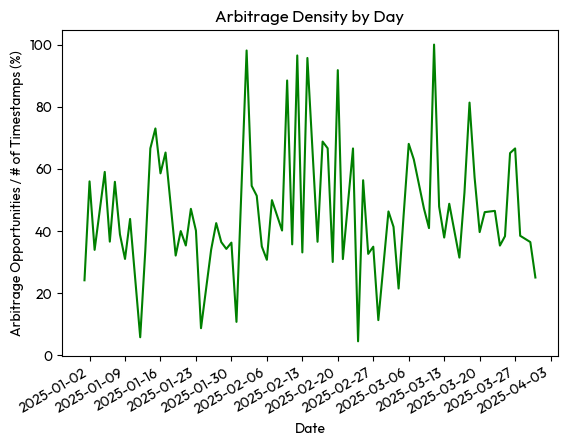

In [42]:
dates = list(data_density.keys())
new_dates = [datetime.strptime(i, "%Y-%m-%d") for i in dates]
new_dates = list(sorted(new_dates))
densities = [100 * data_density[d]["n_arbs"] / data_density[d]["n_timestamps"] for d in dates]

plt.plot(new_dates, densities, color="green")
plt.title("Arbitrage Density by Day")
plt.xlabel("Date")
plt.ylabel("Arbitrage Opportunities / # of Timestamps (%)")
# Show ticks every 7 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate()

In [43]:
df.describe()

,Profit,Timestamp,Base to USD,Date,Cycle Length
count,2.717278e+06,2.717278e+06,0.0,2717278,2.717278e+06
mean,1.000098e+00,1.739596e+09,NaN,2025-02-14 16:45:44.941077,2.710649e+00
min,1.000000e+00,1.735765e+09,NaN,2025-01-01 00:00:00,2.000000e+00
25%,1.000017e+00,1.737946e+09,NaN,2025-01-27 00:00:00,2.000000e+00
50%,1.000044e+00,1.739444e+09,NaN,2025-02-13 00:00:00,3.000000e+00
75%,1.000103e+00,1.741597e+09,NaN,2025-03-10 00:00:00,3.000000e+00
max,1.043642e+00,1.743466e+09,NaN,2025-03-31 00:00:00,9.000000e+00
std,2.404495e-04,2.183469e+06,NaN,NaN,7.831403e-01


In [86]:
profit_cutoffs = [1.0, 1.00001, 1.00002, 1.00005, 1.00011, 2.0]
profit_buckets = [(p, profit_cutoffs[i+1]) for i, p in enumerate(profit_cutoffs[:-1])]
profit_buckets

[(1.0, 1.00001),
 (1.00001, 1.00002),
 (1.00002, 1.00005),
 (1.00005, 1.00011),
 (1.00011, 2.0)]

In [87]:
curr_to_idx = {c: i for i, c in enumerate(CURRENCIES)}
vol_profit_curr = {}
for date in dates:
    d = datetime.strptime(date, "%Y-%m-%d")
    only_date = df[df["Date"] == d]
    if len(only_date) < 10000:
        continue
    vol_profit_curr[date] = {i: [0] * len(CURRENCIES) for i in range(len(profit_buckets))}
    for profit, cycle in zip(only_date["Profit"], only_date["Cycle"]):
        idx = 0
        while profit > profit_cutoffs[idx]:
            idx += 1
        for currency in cycle:
            vol_profit_curr[date][idx - 1][curr_to_idx[currency]] += 1

vol_profit_curr

{'2025-02-10': {0: [4844, 614, 5929, 2904, 723, 6240, 1335, 26, 2472, 568],
  1: [4015, 462, 5031, 2223, 584, 5773, 1432, 17, 2386, 478],
  2: [7383, 820, 10009, 4026, 1201, 11927, 3348, 79, 5808, 874],
  3: [3744, 795, 5885, 2808, 1119, 7366, 1128, 156, 5493, 661],
  4: [1155, 4221, 5786, 809, 494, 1767, 347, 4044, 2074, 224]},
 '2025-02-17': {0: [4429, 1059, 3375, 1857, 986, 2655, 1045, 52, 1631, 327],
  1: [2996, 720, 2384, 1236, 819, 2110, 606, 43, 1359, 295],
  2: [3983, 1391, 3393, 1889, 1418, 3332, 904, 314, 2740, 603],
  3: [2644, 1237, 2505, 1213, 1038, 2015, 512, 483, 2672, 429],
  4: [2785, 2374, 1434, 540, 498, 744, 266, 2119, 1386, 149]},
 '2025-02-05': {0: [4750, 1189, 3469, 2177, 890, 2847, 959, 88, 1391, 335],
  1: [3089, 770, 2570, 1288, 704, 2452, 625, 60, 1295, 291],
  2: [4285, 1228, 3974, 1860, 1206, 4213, 988, 275, 2673, 622],
  3: [3118, 1059, 2982, 1416, 861, 3178, 740, 309, 2641, 548],
  4: [2171, 1031, 1610, 754, 458, 1606, 380, 773, 1702, 235]},
 '2025-02-21'

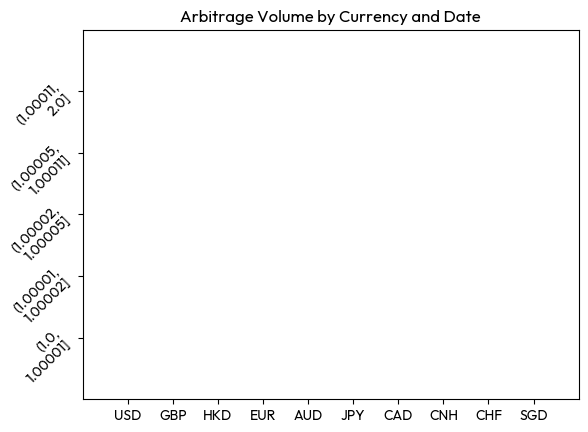

In [ ]:
fig, ax = plt.subplots()

# scat = ax.scatter()

artists = []
for d in sorted(vol_profit_curr.keys(), key=lambda i: datetime.strptime(i, "%Y-%m-%d")):
    # ax = plt.axes()
    # ax = fig.add_subplot(1, 1, 1)
    # ax.set_xlabel(d)
    # container = ax.scatter(list(CURRENCIES), [0] * len(CURRENCIES), s=vol_profit_curr[d][0])
    scatters = []
    date_text = ax.text(0.5, -0.1, d, verticalalignment='bottom', horizontalalignment='center', transform=ax.transAxes)
    scatters.append(date_text)
    for b in range(len(profit_buckets)):
        container = ax.scatter(list(CURRENCIES), [b] * len(CURRENCIES), s=[i/30 for i in vol_profit_curr[d][b]], c=vol_profit_curr[d][b], cmap="viridis")
        scatters.append(container)
    artists.append(scatters)

ax.set_xlim(-1,10)
ax.set_ylim(-1, 5)

plt.title("Arbitrage Volume by Currency and Date")
plt.yticks(list(range(len(profit_buckets))), [f"({i[0]},\n{i[1]}]" for i in profit_buckets], rotation=45)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=1000, blit=True)
plt.show()
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)